## Fashion Mnist using keras to buiding ANN

- Fashion Mnist dataset: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
- Goal: Classify grayscale fashion-mnist images into 10 classes

In [1]:
# First of all define all those libs needed for your project
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
import keras.layers as layers
from typing import Optional


# Common to check version of libs
print(f"Keras version: {keras.__version__}")

Keras version: 2.15.0


# 1. Load fashion mnist

In [2]:
# this is how you can get the dataset from tensorflow
# the oad_data() return two tuples include things as below
(X_train, y_train), (X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train[0],

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:
y_train[16]

1

In [7]:
# The class name contain the true text value corresponding to the number was encode in y_train by mapping the list index to the encoded number.
class_name = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankie boot"]

class_name[y_train[16]]

'Trouser'

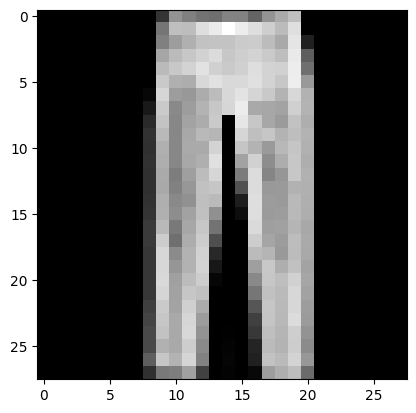

In [8]:
plt.imshow(X_train[16], cmap='gray')
plt.show()

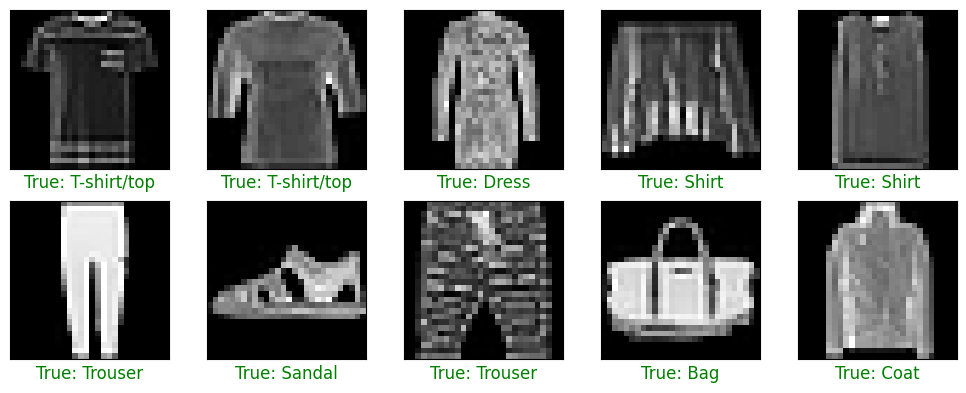

In [9]:
# Define a def for plotting 10 Images randomly from this dataset cause we cannot see all images in one frame,
# the most usefull func in this notebook, it can help you visualize the image using pixel array,

def plot_data(X_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
    n_rows, n_cols = 2,5

    len_x = X_data.shape[0]
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    for idx in range(n_rows * n_cols):
        ax = axes[idx // n_cols, idx % n_cols ]

        img_idx = random.randint(0, len_x)
        ax.imshow(X_data[img_idx, ], cmap="gray")
        ax.set(xticks=[], yticks=[])

        color = 'green'
        true_label_str = f"True: {class_name[y_data[img_idx]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_name[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_string = f"\nPredicted: {predicted_label}"

        img_tile = true_label_str if y_proba is None else true_label_str + predicted_label_string

        ax.set_xlabel(img_tile, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()

# Random 10 images from train set
plot_data(X_train, y_train)

# 2. Image preprocessing
- Reshaping it into a shape that model expects and scaling to the [0,1] scale, this step also known as data normalization
- Transform from `int8` to `float32` because in neural network, everything was computed in float form
- And change scale does not effect anything to the image, see the image below for more

In [10]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train.dtype, X_train.shape

(dtype('float32'), (60000, 28, 28))

In [11]:
X_train[16]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.20784314,
        0.57254905, 0.49803922, 0.4509804 , 0.43529412, 0.50980395,
        0.5058824 , 0.39215687, 0.5764706 , 0.6627451 , 0.74509805,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.45882353,
        0.74509805, 0.7372549 , 0.8666667 , 0.91764706, 0.99607843,
        0.9254902 , 0.8666667 , 0.8039216 , 0.7294118 , 0.87058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49803922,
        0.6117647 , 0.6862745 , 0.75686276, 0.7647059 , 0.7647059 ,
        0.7921569 , 0.7960

In [12]:
# Expand Dimession chanel
# Turn image shape (60000, 28, 28) -> (60000, 28, 28, 1)
# Add new chanel, this case is graycale so we add new one channel, or demenssion
# Why, because it's convention of keras or tensorflow, just follow the rule

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_test.shape, X_test.dtype

((10000, 28, 28, 1), dtype('float32'))

In [13]:
X_train.shape, X_train.dtype

((60000, 28, 28, 1), dtype('float32'))

In [14]:
# The truth is I don't even know what I'm looking at right there, the ouput below
# Keep in mind that this is the 4d pixel normalized array of image 16, the new dimenssion we added above was nothing,
# It hold nothing , you see that I'n not assigning anything to it
# So allow me to give you some word of advice, just follow the rule, like you just understand that is the convetion, the size of image,
# its chanel, total sample, just put it in place, in that array, and step beside, let the model do the rest, just remember the order of these
# properties of a dataset (image dataset) it just a folder has tons of image inside
# Any array has dimenssion above 4, was hard to visualize but tool, so just forget it, understand it like a concept
# the size of a image was a shape of the pixel, this case is 28*28 total pixel in on image, each pixel was represented by a number of color spectrum


X_train[16]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.20784314],
        [0.57254905],
        [0.49803922],
        [0.4509804 ],
        [0.43529412],
        [0.50980395],
        [0.5058824 ],
        [0.39215687],
        [0.5764706 ],
        [0.6627451 ],
        [0.74509805],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.45882353],
        [0.74509805],
        [0.7372549 ],
        [0.8666667 ],
        [0.91764706],
        [0.99607843],
        [0.9254902 ],
        [0.8666667 ],
        

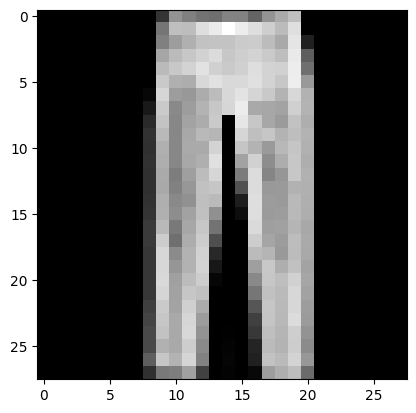

In [15]:
plt.imshow(X_train[16], cmap='gray')

In [16]:
# convert class into binary class matrices 2 => [0,0,1,0,0...] aslo known was Onehot encoding
# 1               : sparse_categorical_crossentropy
# [0,0,1,0,0,...] : categorical_crossentropy
# to be honest, i reaaly don't know why we must do this, but follow the rule right.

y_train_onehot = keras.utils.to_categorical(y_train, len(class_name))
y_test_onehot = keras.utils.to_categorical(y_test, len(class_name))


In [17]:
y_train[16] ,y_train_onehot[16]

(1, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# Neural network

In [18]:
# define input shape to tell model which dimension is image
# the whole stuffs above was insane but just me this one blow my mind
# after you define your big pixel array of all image one by one,
# here you need to tell the model, which demension is your image, weird right,
# if you don't want to use this , you can replace with X_train,shape[1:] instead
input_shape = (28,28,1)

In [33]:
#  I have no clue what is these code?
# Some kind of way to create and define mmodel deep learning or define neural network

model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # turn (28,28,1) into one dimension vector (28*28) = 784
    layers.Dense(512, activation='relu'), # avoid linear model
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_name), activation='softmax') # Calculated probability
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.output_shape

(None, 10)

In [20]:
# /After define tho  model you need to compile it so you can fit it later
# or the truth is that you can specify the optimizer and loss function
# these stuffs below was created in experience not randomly, and you must practice more and more to get this

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
# Now it's time to train the model, fit == train, make sure that you save the training result to know
# how accuracy the model is, and evaluate it by plotting
# It necessary for you to understand how the model learn, visualize the learning curve will help you alots.

epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_onehot,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 13s 28ms/step - loss: 0.5590 - accuracy: 0.7952 - val_loss: 0.4079 - val_accuracy: 0.8505
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.3818 - accuracy: 0.8579 - val_loss: 0.4310 - val_accuracy: 0.8290
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.3371 - accuracy: 0.8741 - val_loss: 0.3911 - val_accuracy: 0.8600
Epoch 4/10
422/422 [==============================] - 5s 12ms/step - loss: 0.3097 - accuracy: 0.8831 - val_loss: 0.3470 - val_accuracy: 0.8708
Epoch 5/10
422/422 [==============================] - 6s 15ms/step - loss: 0.2904 - accuracy: 0.8909 - val_loss: 0.3314 - val_accuracy: 0.8830
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.2725 - accuracy: 0.8969 - val_loss: 0.3501 - val_accuracy: 0.8755
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2590 - accuracy: 0.9020 - val_loss: 0.3205 - val_accuracy: 0.888

In [22]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']


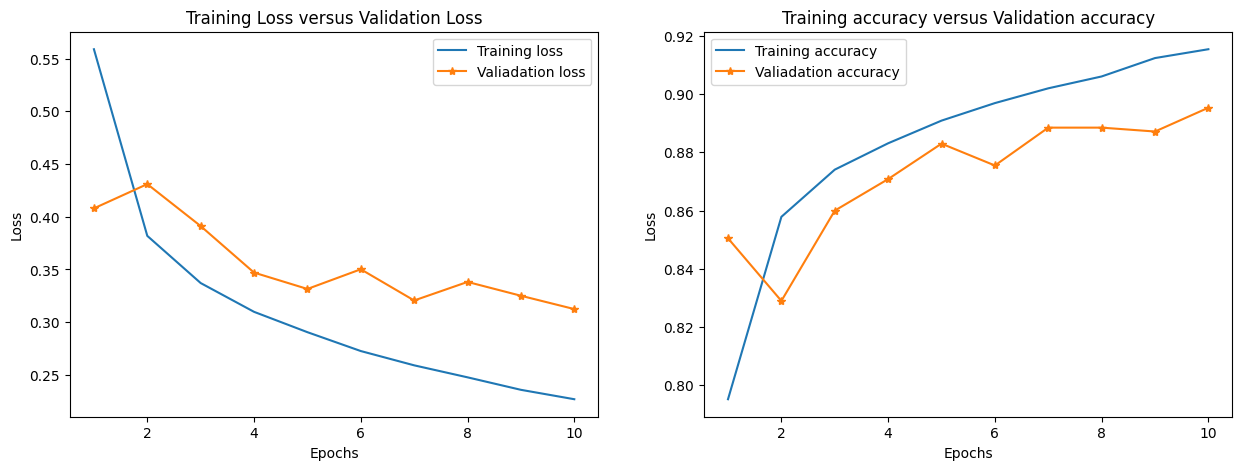

In [24]:
# By visualize the learning curve you can evaluate the model in overview, and easy to interpret


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [idx + 1 for idx in range(epochs)]

ax1.plot(epoch_runs, train_loss, label="Training loss")
ax1.plot(epoch_runs, val_loss, label="Valiadation loss", marker="*")
ax1.set(title="Training Loss versus Validation Loss", xlabel="Epochs", ylabel="Loss")
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training accuracy")
ax2.plot(epoch_runs, val_acc, label="Valiadation accuracy", marker="*")
ax2.set(title="Training accuracy versus Validation accuracy", xlabel="Epochs", ylabel="Loss")
ax2.legend()
plt.show()


# 4. Model Evaluation

In [25]:
score = model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8876


In [26]:
print(f"Test loss:  {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss:  0.3354
Test accuracy: 0.8876


# 5. Prediction

In [27]:
X_sample = X_test[: 5]
y_proba = model.predict(X_sample)


1/1 [==============================] - 0s 90ms/step


In [28]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.265, 0.   , 0.003, 0.   , 0.   , 0.   , 0.731, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [29]:
prediction = np.argmax(y_proba, axis=1)


In [30]:
[class_name[pred] for pred in prediction]

['Ankie boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [31]:
y_proba = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


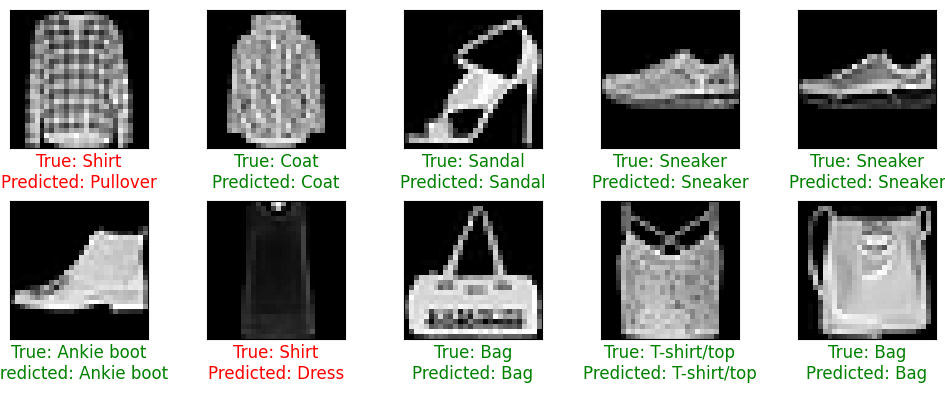

In [32]:
# I need to say that this func was out of mind,

plot_data(X_test, y_test, y_proba)